# Imbalanced dataset 

- When dataset, let's say for binary classification, if training dataset has 900 instances of target as No and 100 instances with target as Yes then by training the model based on this dataset can lead to problem of overfitting. This condition is known as data imbalanced.

- Data can have (60%, 40%) or (50%, 50%) ratio with their targets but anything aprt from these will tend to bias the model.


In [41]:
import numpy as np
import pandas as pd

In [42]:
data = pd.read_csv('C:/Users/Shubham/Documents/Data Science/Notebooks/00. Data_Store/creditcard_huge.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Get the data for both classes

(492, 31) (284315, 31)


<AxesSubplot:>

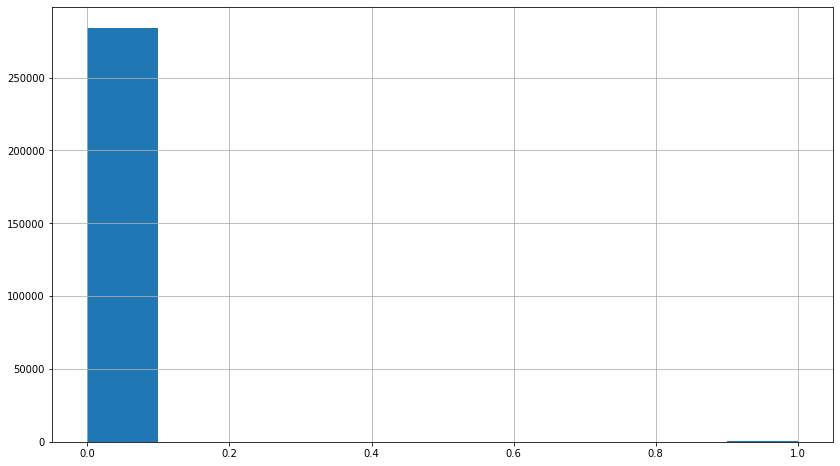

In [43]:
fraud = data[data["Class"]==1]
normal = data[data["Class"]==0]

print(fraud.shape, normal.shape)

data["Class"].hist()

### From above we can conclude that data is imbalanced.


# 1. Under Sampling - 
- When we have 200 instances of data from '0' class and 1000 from '1' class, we can take 200 from '0' and 200 from '1' class so that the ratio is maintained at 50:50. this is called Undersampling.

- Undersampling can be only done when we have huge amount of data.e.g. in millions

In [44]:
x = data.drop(["Class"], axis=1)
y = data["Class"]

print(x.shape, y.shape)

(284807, 30) (284807,)


In [45]:
## Get the Fraud and the normal dataset 

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [57]:
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()

X_res, y_res = under_sampler.fit_resample(X,Y)

TypeError: __init__() got an unexpected keyword argument 'ratio'

In [47]:
X_res.shape,y_res.shape

((984, 30), (984,))

# Upsampling -

- Similar to undersampling when their is data imbalance, we don't reduce the data set from class having maximum instances but we rather increase the instances of class who have less dataset.

- Data for all the all features is filled such that, 

In [48]:
X = data.drop(["Class"], axis=1)
Y = data["Class"]

print(X.shape, Y.shape)

(284807, 30) (284807,)


In [49]:
fraud_ = data[data["Class"]==1]
normal_ = data[data["Class"]==0]

print(fraud_.shape, normal_.shape)

(492, 31) (284315, 31)


In [58]:
from imblearn.over_sampling import RandomOverSampler  

over_sampler = RandomOverSampler()

X_res, Y_res = over_sampler.fit_resample(X, Y)

In [59]:
print(X_res.shape, Y_res.shape)

(568630, 30) (568630,)


## When using RandomOverSampler() or RandomUnderSampler() we can use parameter of "ratio=1" so that sampling done accordingly
